# Test notebook

In [1]:
library(ArchR)
library(org.Ss.eg.db)
library(SuscrofaTxdb.11.108.july)
library(patchwork)
library(Seurat)
library(dplyr)
library(RColorBrewer)
library(viridis)
library(gprofiler2)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
options(repr.plot.width = 24, repr.plot.height = 17, repr.plot.pointsize = 24)

In [3]:
load(file = "/home/adufour/work/rds_storage/omics/assignation_v2.RData")

Warning message in readChar(con, 5L, useBytes = TRUE):
“impossible d'ouvrir le fichier compressé '/home/adufour/work/rds_storage/omics/assignation_v2.RData', cause probable : 'Aucun fichier ou dossier de ce type'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): impossible d'ouvrir la connexion


In [10]:
write.csv(getCellColData(ArchRProj = archrproj2), "/home/adufour/work/table/cell_assignation_multiomics_v2.csv", row.names=TRUE)

In [ ]:
plot_score <- plotEmbedding(archrproj2, name = "predictedScore_Un", embedding = "UMAP_Harmony", plotAs = "points", size = 1.5, labelAsFactors=F, labelMeans=F)

In [ ]:
plot_score_gg <- plot_score$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  scale_color_viridis(
    guide = guide_colorbar(frame.colour = 'black', ticks.colour = 'black'),
    #labels = scales::comma,
  ) +
  theme_bw() +
  labs(color = 'Assignment\nscore') +
  theme(legend.position = 'right',
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.key.size = unit(0.35, "inches")) +
  coord_fixed()

plot_score_gg

In [23]:
ggsave("/home/adufour/work/notebook/plots/omics/cluster_assignation_score.svg", plot_score_gg, height = 13, width = 16)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36aa3d296793f5-Date-2024-01-18_Time-09-39-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36aa3d296793f5-Date-2024-01-18_Time-09-39-36.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36aa3d7b227257-Date-2024-01-18_Time-09-39-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36aa3d7b227257-Date-2024-01-18_Time-09-39-58.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36aa3d43fb8d92-Date-2024-01-18_Time-09-40-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy =

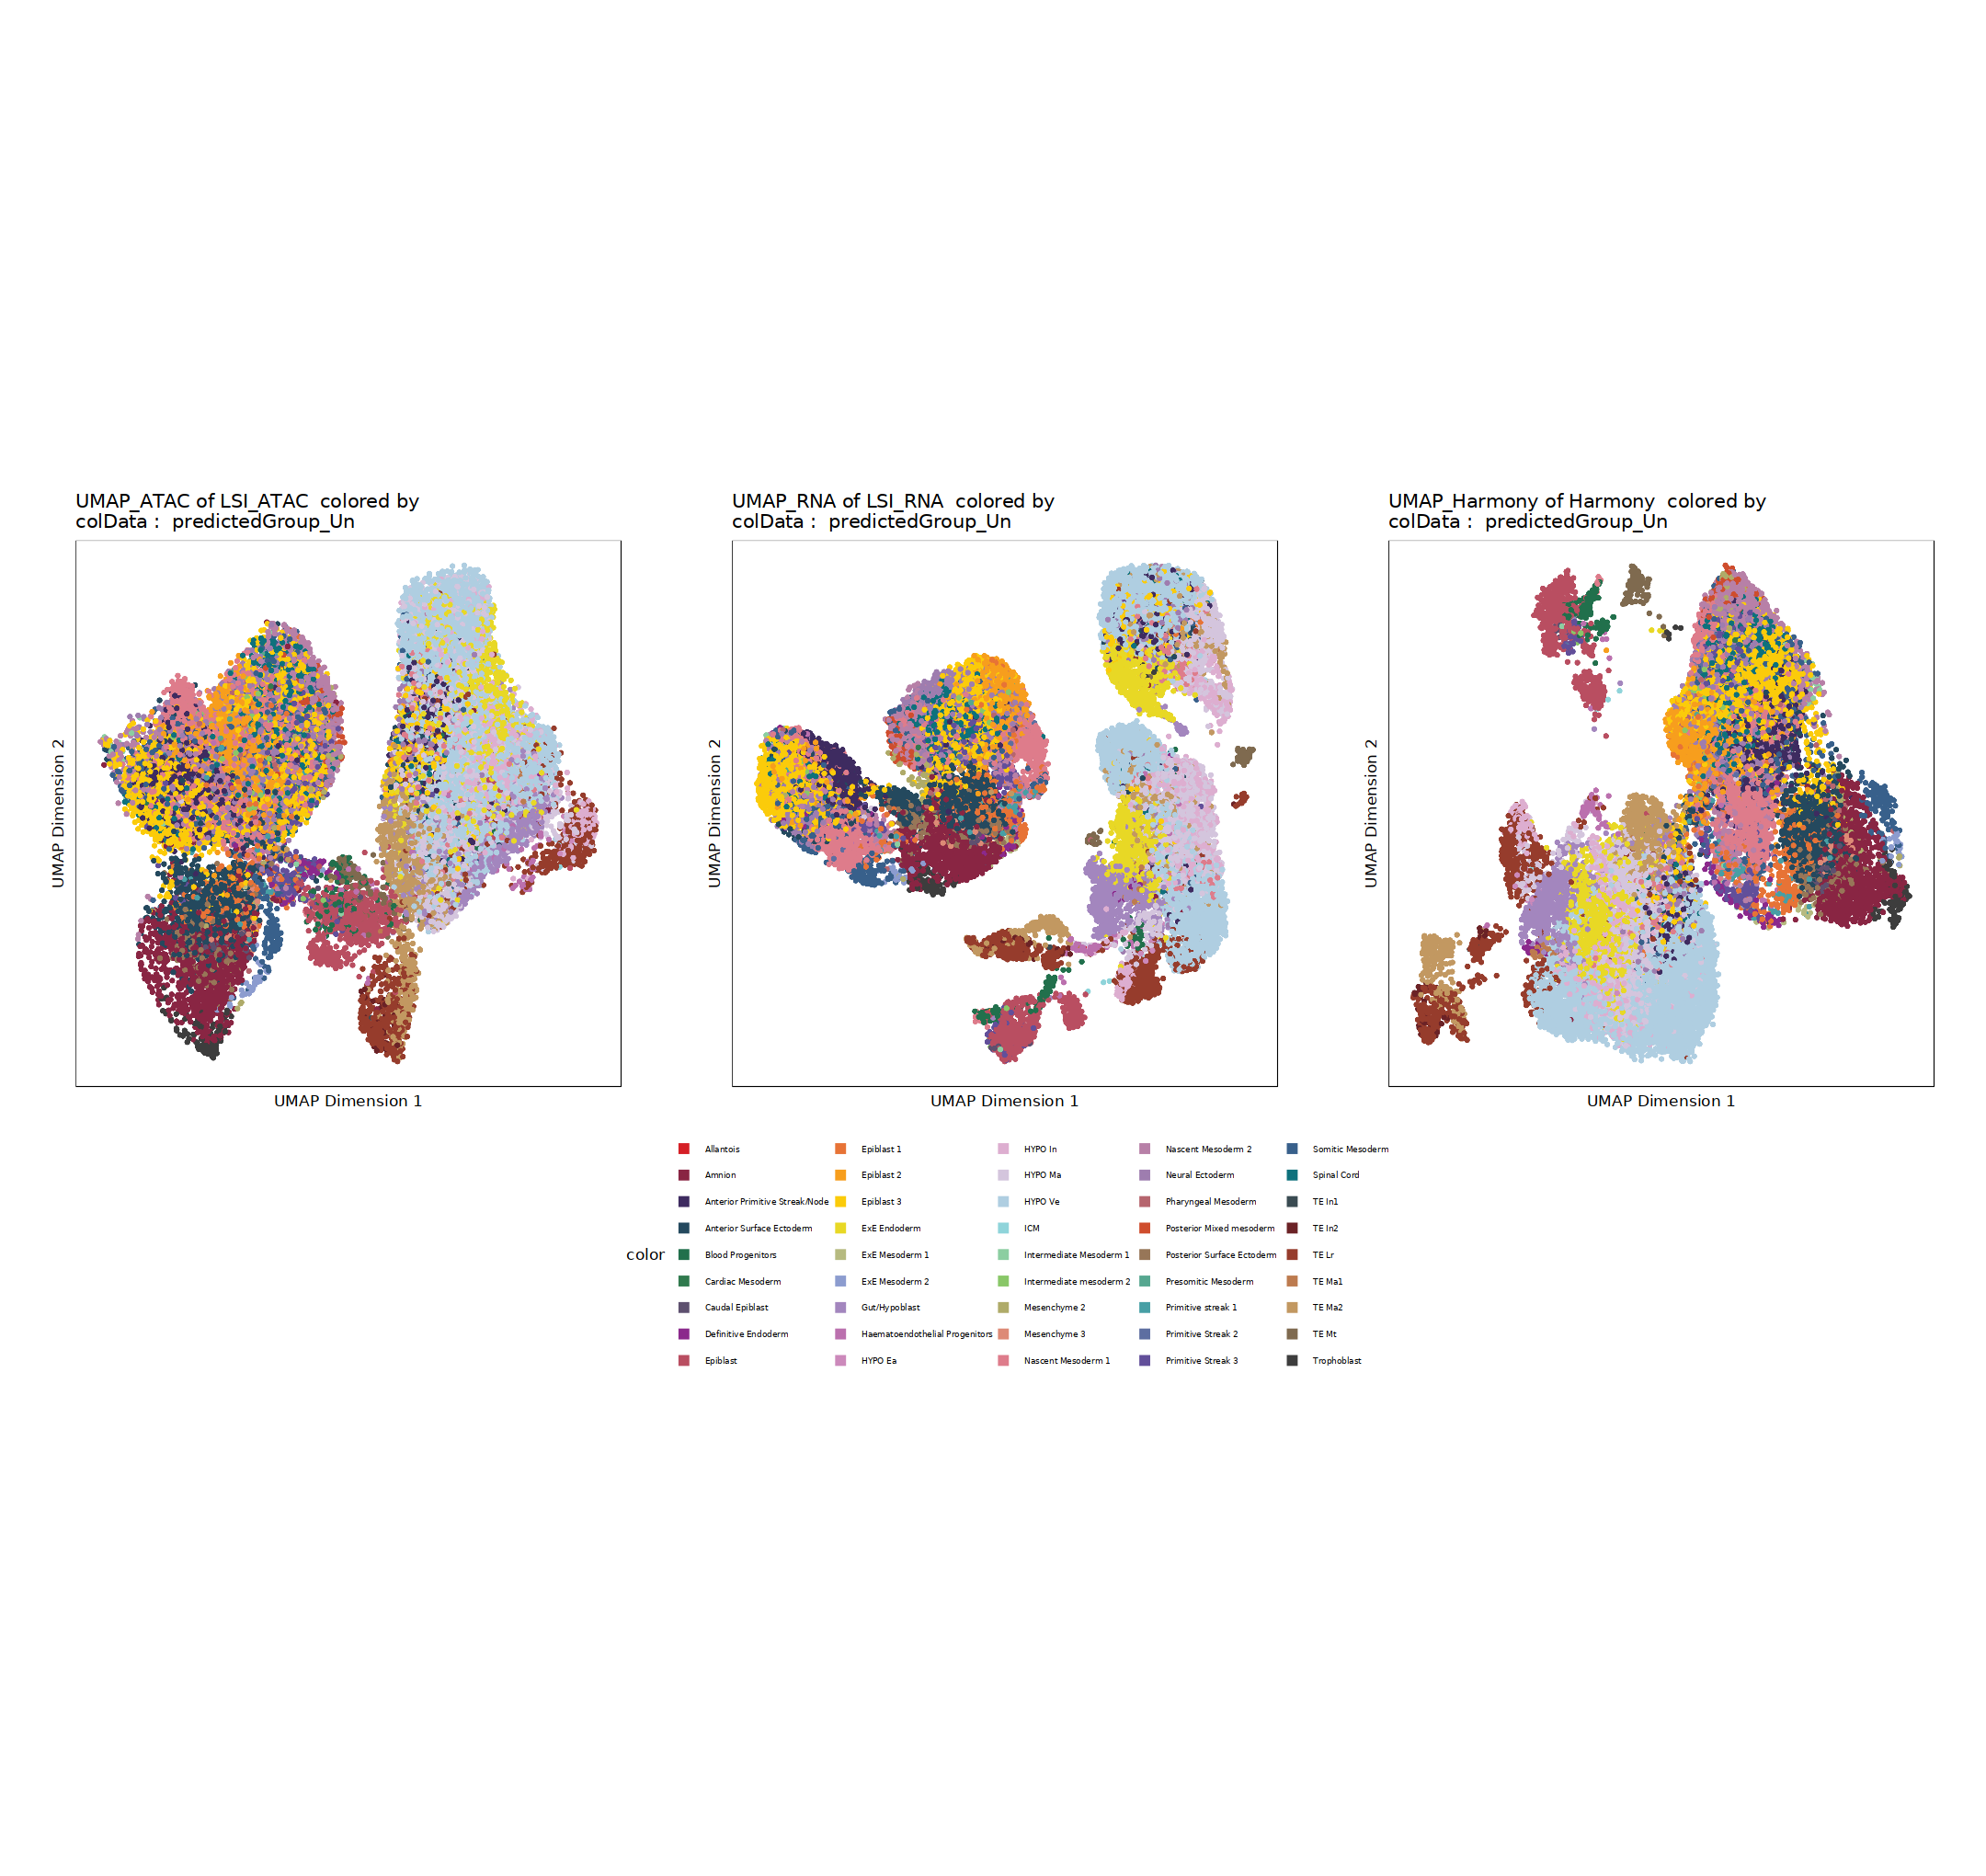

In [8]:
p1 <- plotEmbedding(archrproj2, name = "predictedGroup_Un", embedding = "UMAP_ATAC", size = 1.5, labelAsFactors=F, labelMeans=F)
p2 <- plotEmbedding(archrproj2, name = "predictedGroup_Un", embedding = "UMAP_RNA", size = 1.5, labelAsFactors=F, labelMeans=F)
p3 <- plotEmbedding(archrproj2, name = "predictedGroup_Un", embedding = "UMAP_Harmony", size = 1.5, labelAsFactors=F, labelMeans=F)

p1 + p2 + p3 + patchwork::plot_layout(nrow = 1, guides = "collect") &
  theme(legend.position='bottom')

In [9]:
color_list <- c('ICM' = '#FFC312', 'TE Ea' = '#C4E538', 'TE In1' = '#12CBC4', 'HYPO In' = '#FDA7DF', 'HYPO Ma' = '#ED4C67', 'Epiblast' = '#FFC312', 'TE In2' = '#D980FA',
  'TE Lr' = '#6F1E51', 'HYPO Ea' = '#D980FA', 'TE Mt' = '#B53471', 'HYPO Ve' = '#EE5A24', 'TE Ma1' = '#c7ecee', 'TE Ma2' = '#FDA7DF', 'TE Il1' = '#9980FA', 
  'Mesendoderm' = '#833471', "Trophoblast" = "#3565A7", "Amnion" = "#5891BF", "Anterior Surface Ectoderm" = "#D3F1FD", "Posterior Surface Ectoderm" = "#C1DDBB",
  "Brain" = "#92CBC1", "Spinal Cord" = "#2B645E", "Epiblast 1" = "#D5BF9E", "Epiblast 2" = "#E8D6A8", "Epiblast 3" = "#F8EAB0", "Epiblast 4" = "#CAD2CE", "PGC" = "#8249B4",
  "Anterior Primitive Streak/Node" = "#FFF478", "Definitive Endoderm" = "#E6FFA6", "Gut/Hypoblast" = "#AFE76A", "Hypoblast" = "#61B62B", "ExE Endoderm" = "#327D21",
  "Primitive streak 1" = "#FFE173", "Primitive Streak 2" = "#FBAD54", "Primitive Streak 3" = "#FFCD8B", "Nascent Mesoderm 1" = "#EE7C54", "Nascent Mesoderm 2" = "#F99878",
  "Mixed Mesoderm" = "#F4192B", "Posterior Mixed mesoderm" = "#B81828", "ExE Mesoderm 1" = "#821825", "ExE Mesoderm 2" = "#A2545E", "Somitic Mesoderm" = "#F9D1EE",
  "Presomitic Mesoderm" = "#E076C5", "Pharyngeal Mesoderm 1" = "#E0057A", "Pharyngeal Mesoderm 2" = "#F3A0CC", "Intermediate Mesoderm 1" = "#ff624a", 
  "Intermediate Mesoderm 2" = "#EE71B6", "Haematoendothelial Progenitors" = "#8F4986", "Blood Progenitors" = "#590D57", "Mesenchyme 1" = "#1b0840",
  "Mesenchyme 2" = "#430707", "Mesenchyme 3" = "#724545", "Allantois" = "#AE1667", "Cardiac Mesoderm" = "#000000", "Neural Ectoderm" = "#c7d0cb",
  "Pharyngeal Mesoderm" = "#e10578", "Caudal Epiblast" = "#97c9c3", "Intermediate mesoderm 2" = "#f86cb6", "Lateral Plate Mesoderm" = "#fff676")

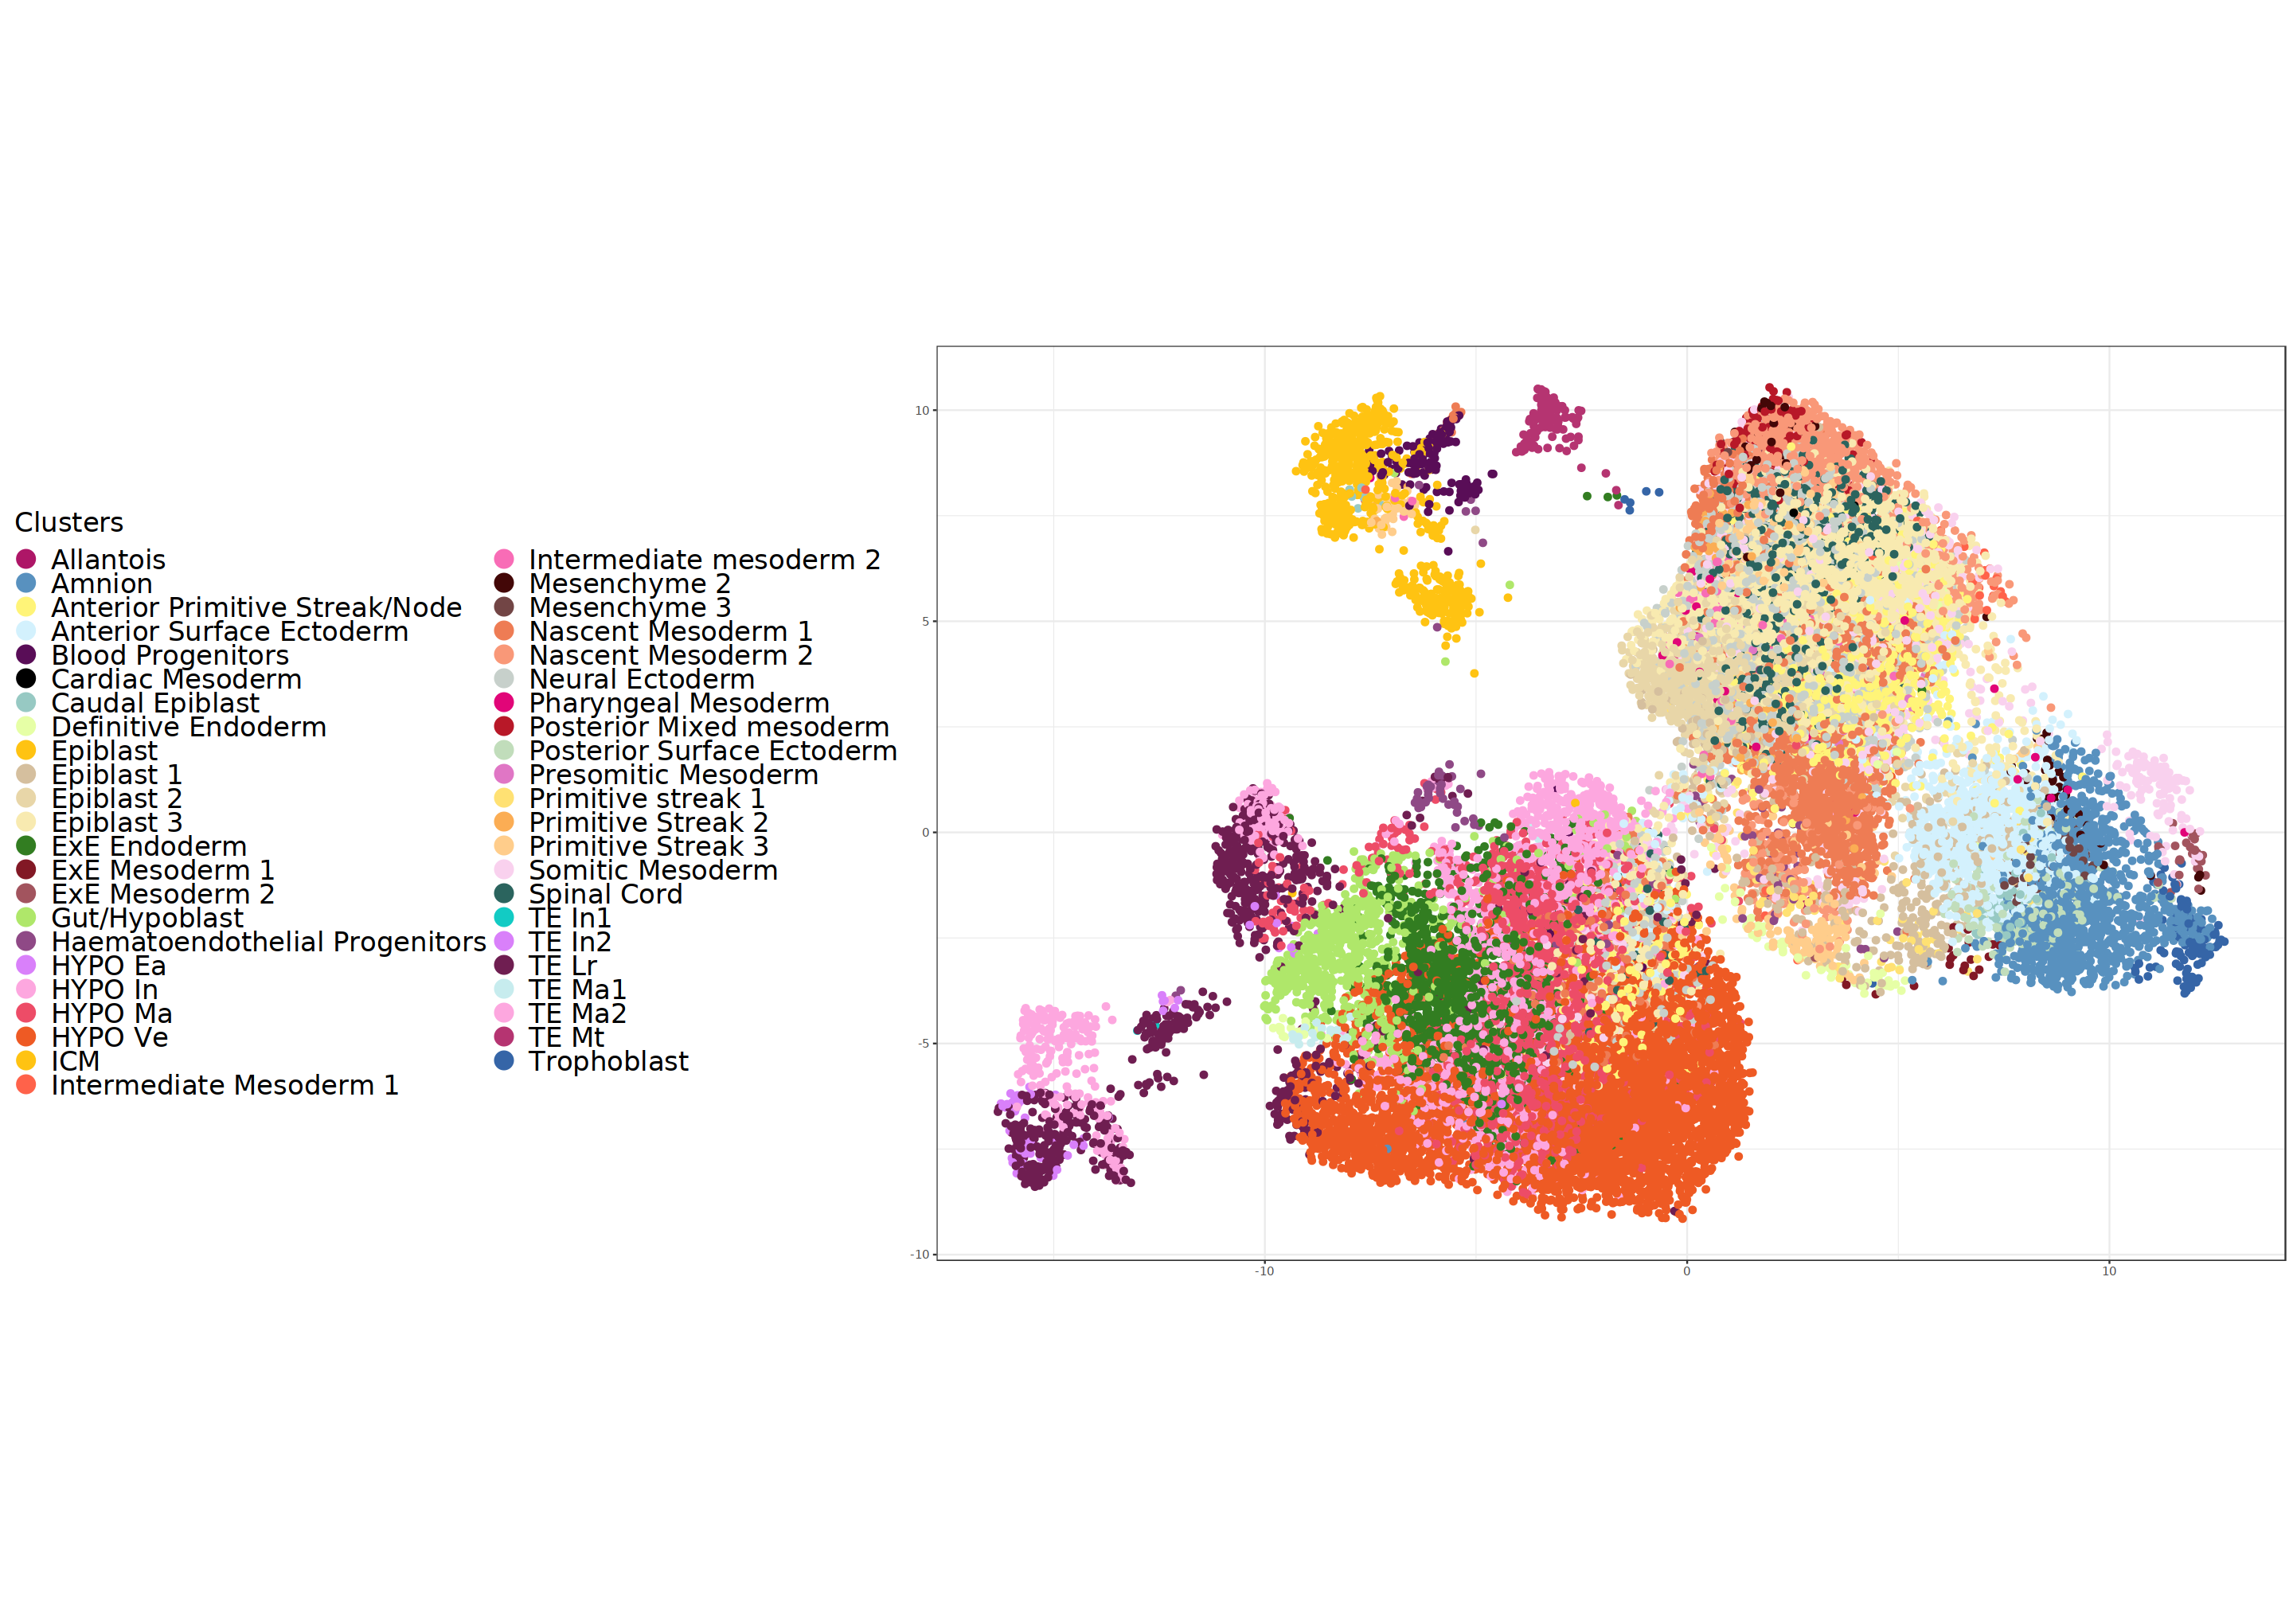

In [14]:
plot_1 <- p3$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  theme_bw() +
  scale_color_manual(values = color_list,
                    guide = guide_legend(ncol = 2, override.aes = list(size = 6))) +
  labs(color = 'Clusters') +
  theme(legend.position = 'left',
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20)) +
  coord_fixed()

plot_1

In [27]:
ggsave("/home/adufour/work/notebook/plots/omics/cluster_assignation.svg", plot_1, height = 13, width = 16)

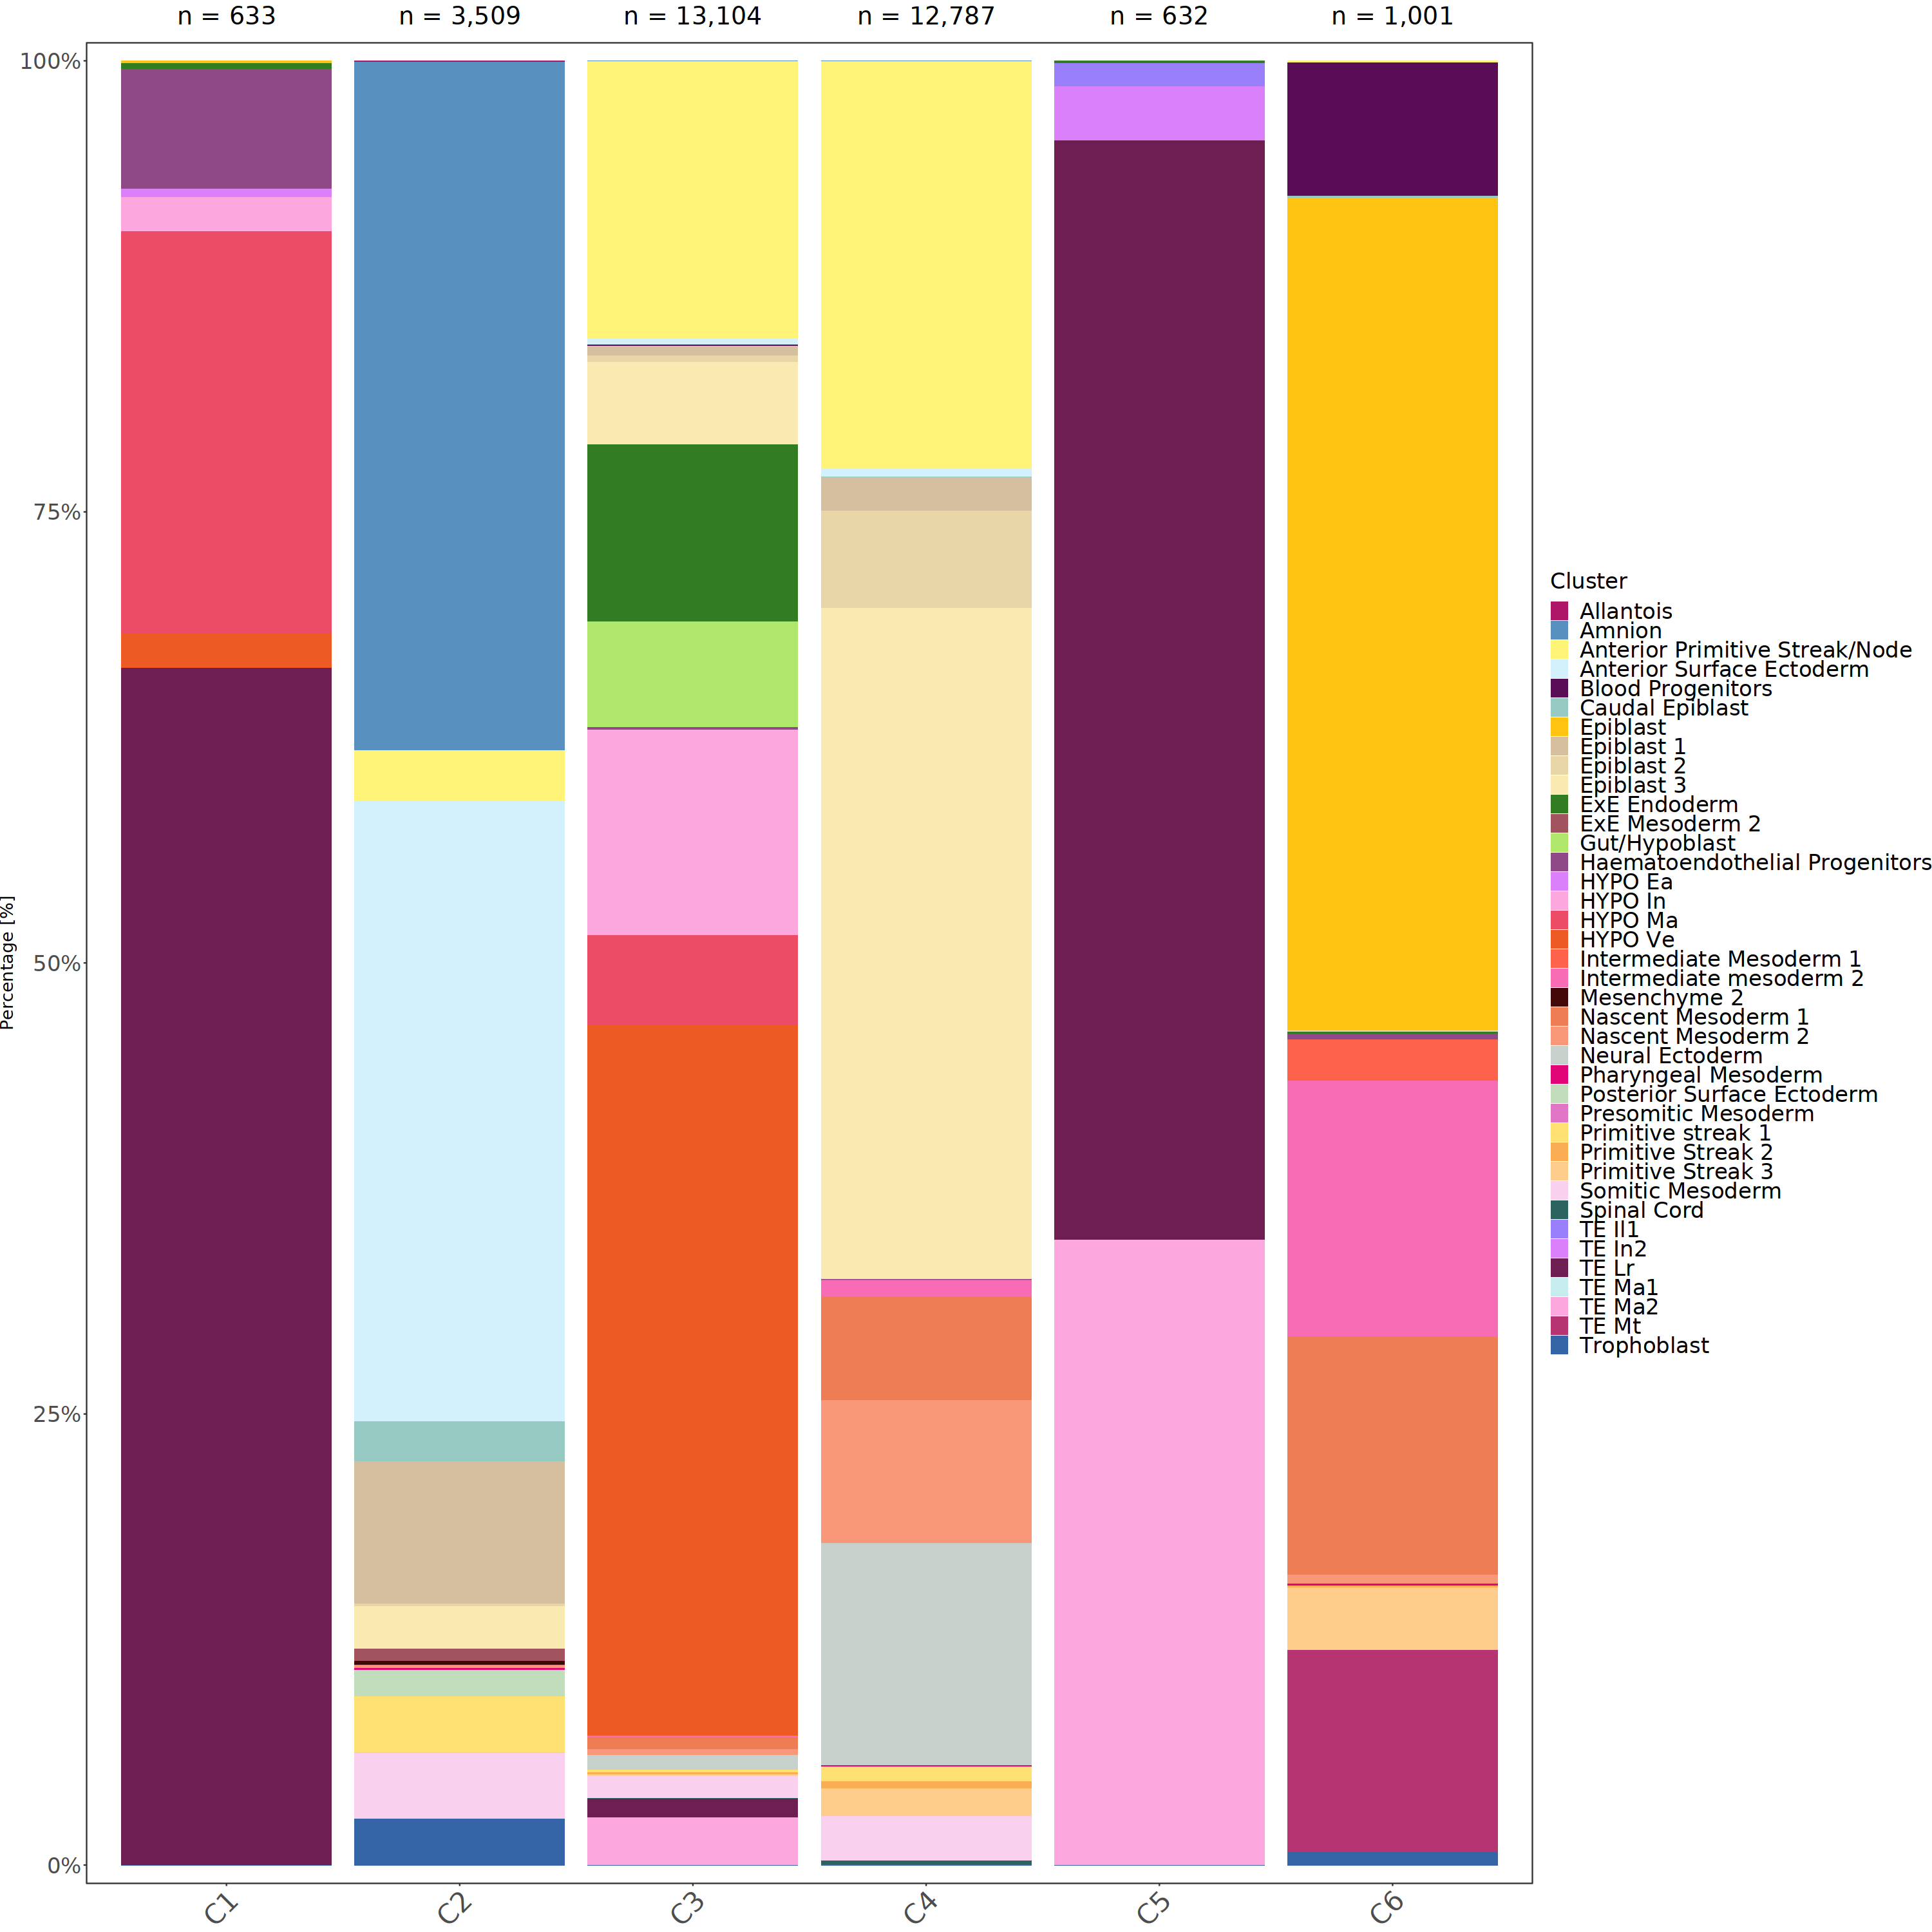

In [19]:
temp_labels <- as.data.frame(table(archrproj2@cellColData$Clusters))

hist <- table_cluster_assign %>%
  dplyr::mutate(Cluster = factor(Var1, levels = c("C1","C2","C3","C4","C5","C6","C7","C8"))) %>%
  ggplot(aes(Cluster, Freq)) +
  geom_bar(aes(fill = Var2), position = 'fill', stat = 'identity') +
  geom_text(
    data = temp_labels,
    aes(x = Var1, y = Inf, label = paste0('n = ', format(Freq, big.mark = ',', trim = TRUE)), vjust = -1),
    color = 'black', size = 8
  ) +
  scale_fill_manual(name = 'Cluster', values = color_list) +
  scale_y_continuous(name = 'Percentage [%]', labels = scales::percent_format(), expand = c(0.01,0)) +
  coord_cartesian(clip = 'off') +
  guides(fill=guide_legend(ncol=1)) +
  theme_bw() +
  theme(
    legend.position = 'right',
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 20),
    text = element_text(size = 16),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.title = element_text(size = 13, hjust = 0.5, vjust = 3.5, face = "bold"),
    axis.title.x = element_blank(),
    axis.text.x = element_text(size = 25, angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(size = 20),
    plot.margin = margin(t = 40, r = 0, b = 0, l = 0, unit = 'pt')
  )

hist

In [33]:
ggsave("/home/adufour/work/notebook/plots/omics/hist_assignation.svg", hist, height = 13, width = 18)